In [1]:
import numpy as np
import pandas as pd
from utils import get_data_as_list
import re
import seaborn as sns
from collections import Counter

In [2]:
data_list = get_data_as_list(day=7)
data_list[:15]

['1101,1,29,67,1102,0,1,65,1008,65,35,66,1005,66,28,1,67,65,20,4,0,1001,65,1,65,1106,0,8,99,35,67,101,99,105,32,110,39,101,115,116,32,112,97,115,32,117,110,101,32,105,110,116,99,111,100,101,32,112,114,111,103,114,97,109,10,1174,360,173,61,168,663,15,245,841,35,476,467,1202,235,427,399,230,649,168,1222,444,577,486,877,643,325,22,558,135,1259,917,672,1429,290,592,793,148,272,1654,187,48,120,721,833,298,752,381,45,630,252,706,270,14,132,576,326,908,331,562,207,935,348,1178,1299,33,33,463,4,230,26,289,961,77,306,910,252,1433,14,396,1013,70,18,1066,55,100,627,680,1101,135,443,307,1027,254,1298,48,248,414,416,551,596,407,516,36,39,3,853,1120,257,178,136,5,703,609,595,50,724,1260,266,108,508,287,105,21,188,529,58,429,801,641,689,300,114,1218,603,418,140,73,14,268,1029,767,0,1533,1207,8,396,106,375,602,1,1326,43,94,1097,1,158,717,183,200,36,39,585,727,43,314,468,1011,530,213,1532,242,396,780,204,107,533,1274,250,182,208,145,146,12,511,1091,337,1448,515,603,506,664,37,385,1053,212,1487,151,181,

In [3]:
def get_array_data(data_list):
    list_of_strings = data_list[0].split(',')
    list_of_ints = [int(x) for x in list_of_strings]
    return list_of_ints

In [4]:
list_of_ints = get_array_data(data_list)
int_array = np.array(list_of_ints)

check out the distribution of crab positions

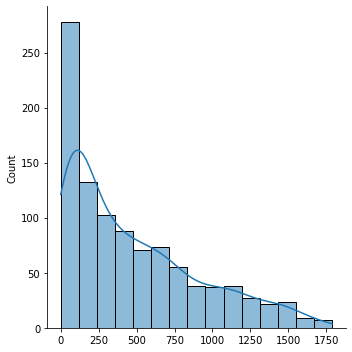

In [5]:
sns.displot(x=int_array, kde=True)

# part 1

In [6]:
sum_dist = np.zeros((max(int_array)))

In [7]:
for ind in np.arange(max(int_array)):
    sum_dist[ind] = np.sum(np.abs(int_array - ind))

In [8]:
solution1 = min(sum_dist)
solution1

344605.0

In [9]:
# position at which the minimum is reached
np.where(sum_dist == min(sum_dist))[0]

array([341], dtype=int64)

# part 2
not every step is equally costly - the more steps, the more expensive

In [10]:
sum_dist_weighted = np.zeros((max(int_array)))

In [11]:
for ind in np.arange(max(int_array)):
    abs_diff = np.abs(int_array - ind)
    current_counter = Counter(abs_diff)
    my_sum = 0
    for key, value in zip(current_counter.keys(), current_counter.values()):
        try:
            my_sum += np.cumsum(np.arange(key+1))[-1] * value
        except IndexError:
            pass
    sum_dist_weighted[ind] = my_sum

In [12]:
solution2 = min(sum_dist_weighted)
solution2

93699985.0

In [16]:
# position at which the minimum is reached
np.where(sum_dist_weighted == min(sum_dist_weighted))[0]

array([5], dtype=int64)

# test data

In [13]:
test_ints = np.array([16,1,2,0,4,2,7,1,2,14])

In [14]:
sum_dist_weighted = np.zeros((max(test_ints)))
for ind in np.arange(max(test_ints)):
    abs_diff = np.abs(test_ints - ind)
    current_counter = Counter(abs_diff)
    my_sum = 0
    for key, value in zip(current_counter.keys(), current_counter.values()):
        try:
            my_sum = my_sum + np.cumsum(np.arange(key+1))[-1] * value
        except IndexError:
            pass
    sum_dist_weighted[ind] = my_sum

In [15]:
min(sum_dist_weighted)

168.0

need to watch out - that's the second time my first attempt was wrong because of python indexing/generating ranges that go one less far than I thought...